# Import The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load The Text

In [2]:
tweet=pd.read_csv('tweet.csv')
tweet.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763,Need Sick Character artâ“#art #artist #Artist...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community


In [3]:
tweet.tail(5)

,id,tweet_text,tweet_created_at,tweet_intent
127448,1278721,"@Jason My company Universe is solving this, an...",2022-08-08T03:32:01.000Z,NaN
127449,1278723,@BosoTokyo Many will get rekt in this NFT,2022-08-08T03:32:00.000Z,NaN
127450,1278724,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,2022-08-08T03:32:00.000Z,NaN
127451,1278725,@1kz3ro @UNLEASHED_NFT I love this job,2022-08-08T03:31:59.000Z,NaN
127452,1278729,@Shill_Ronin @UNLEASHED_NFT my proof https://t...,2022-08-08T03:31:58.000Z,NaN


# Text Cleaning

In [4]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127453 entries, 0 to 127452
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                127453 non-null  int64 
 1   tweet_text        127453 non-null  object
 2   tweet_created_at  127453 non-null  object
 3   tweet_intent      96364 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.9+ MB


In [5]:
tweet['tweet_intent'].unique()

array(['Community', 'Giveaway', 'Appreciation', 'Presale', 'Whitelist',
       'pinksale', 'Done', 'Interested', 'Launching Soon', nan],
      dtype=object)

##### Missing values

In [6]:
tweet['tweet_intent'].isnull().sum()

31089

In [7]:
#% of null values
tweet_intent_percentage=print('percentage of missing values'.upper())
tweet['tweet_intent'].isna().sum()/tweet['tweet_intent'].shape[0]*100

PERCENTAGE OF MISSING VALUES


24.392521164664622

##### Duplicates

In [8]:
# Check duplicates in a data frame
tweet.duplicated().sum()

0

##### Value Counts

In [9]:
tweet['tweet_intent'].value_counts()

Community         41510
Giveaway          21041
Appreciation      16451
Whitelist          8320
Presale            5107
Done               3049
pinksale            477
Interested          276
Launching Soon      133
Name: tweet_intent, dtype: int64

##### Drop Columns

In [10]:
tweet.drop(['id','tweet_created_at'],axis=1,inplace=True)
tweet.head()

,tweet_text,tweet_intent
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,Community
1,Need Sick Character artâ“#art #artist #Artist...,Giveaway
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,Appreciation
3,@CryptoBatzNFT @DarekBTW The first project in ...,Community
4,@sashadysonn The first project in crypto with ...,Community


##### Summary

1)Atleast 24% means 31089 rows are missing in tweet intents column.

2)No duplicates are present.

3)tweet intent attribute has 9 classes.

4)Dropped id and tweet_created_at as no use of it.

# Text Pre-processing

C:\Users\DELL\anaconda3\anaconda nevigator\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


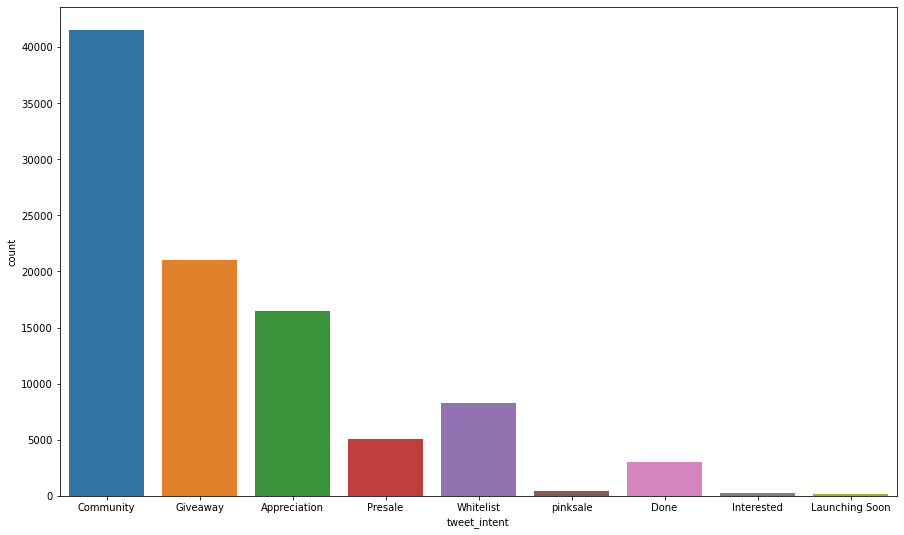

In [11]:
# Plot category data
plt.figure(figsize=(15,9))
sns.countplot(tweet.tweet_intent)
plt.show()

+ Using countplot plotted intent of tweets which has 9 classes where community has more rate followed by giveaway, appreciation etc

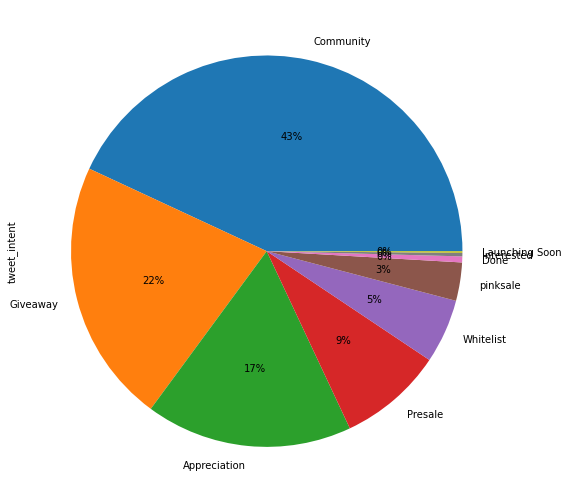

In [12]:
tweet_intent = tweet['tweet_intent'].shape[0]
Community= tweet[tweet.tweet_intent == 'Community'].shape[0]
Giveaway= tweet[tweet.tweet_intent == 'Giveaway'].shape[0]
Appreciation= tweet[tweet.tweet_intent == 'Appreciation'].shape[0]
Presale= tweet[tweet.tweet_intent == 'Presale'].shape[0]
Whitelist= tweet[tweet.tweet_intent == 'Whitelist'].shape[0]
pinksale= tweet[tweet.tweet_intent == 'pinksale'].shape[0]
Done= tweet[tweet.tweet_intent == 'Done'].shape[0]
Interested= tweet[tweet.tweet_intent == 'Interested'].shape[0]
Launching_Soon= tweet[tweet.tweet_intent == 'Launching Soon'].shape[0]

_ = tweet['tweet_intent'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Community', 'Giveaway', 'Appreciation', 'Presale', 'Whitelist','pinksale', 'Done', 'Interested', 'Launching Soon'], figsize = (25, 9))

+ To check more in percentage, Used Pie Chart

1) 43% of tweet about community
2) 22% of Giveaway
3) 17% of Appreciation
4) 9% of Presale 
5) 5% of whitelist
6) 3% of pinksale

#####  Punctuations and Stopwords remove.

+ Now, let's get rid of the stopwords i.e words which occur very frequently but have no possible value like a, an, the, are etc

In [13]:
tweet['tweet_text'][:5]

0    @crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...
1    Need Sick Character artâ“#art #artist #Artist...
2    @The_Hulk_NFT @INagotchiNFT @Tesla @killabears...
3    @CryptoBatzNFT @DarekBTW The first project in ...
4    @sashadysonn The first project in crypto with ...
Name: tweet_text, dtype: object

In [14]:
STOPWORDS=set(stopwords.words('english'))

In [15]:
# Applying a first round of text cleaning techniques

def clean_text(tweet_text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = tweet_text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

# Applying the cleaning function to both test and training datasets
tweet['tweet_text'] = tweet['tweet_text'].apply(lambda x: clean_text(x))


# Let's take a look at the updated text
tweet.head()

,tweet_text,tweet_intent
0,cryptobrody moonrunnersnft itsukinft thelittle...,Community
1,need sick character artâ“art artist artists a...,Giveaway
2,thehulknft inagotchinft tesla killabearsnft el...,Appreciation
3,cryptobatznft darekbtw first project crypto mo...,Community
4,sashadysonn first project crypto move earn ast...,Community


##### Deal with Missing Values

In [16]:
tweet.shape

(127453, 2)

In [17]:
tweet_missing=tweet[tweet['tweet_intent'].isnull()]
tweet_missing.head()

,tweet_text,tweet_intent
96364,ðÿ§™â€â™‚ï¸ wizardia nfts game magicfilled m...,NaN
96365,daolm dont miss chance win nft worth simple st...,NaN
96366,zesty faucet bitcoiner making tweet claim free...,NaN
96367,ðÿ§™â€â™‚ï¸ wizardia nfts game magicfilled m...,NaN
96368,kavaboynft message letâ€™s talk marketing project,NaN


In [18]:
new_tweet=tweet.dropna()
new_tweet.head()

,tweet_text,tweet_intent
0,cryptobrody moonrunnersnft itsukinft thelittle...,Community
1,need sick character artâ“art artist artists a...,Giveaway
2,thehulknft inagotchinft tesla killabearsnft el...,Appreciation
3,cryptobatznft darekbtw first project crypto mo...,Community
4,sashadysonn first project crypto move earn ast...,Community


In [19]:
new_tweet.isnull().sum()

tweet_text      0
tweet_intent    0
dtype: int64

In [20]:
new_tweet.shape

(96364, 2)

#### Summary of text cleaning

1)As any text data, tweets are quite unclean having punctuations, numbers and short cuts.So removed these punctuations.

2)Removed stopwords like a, an, the, which are not giving any useful meaning to it.

3)Dropped missing values,later will use it for prediction

### Train Test split

+ Splitting data on new data without missing values

In [21]:
X = new_tweet.tweet_text.values
y = new_tweet.tweet_intent
print(X.shape)
print(y.shape)

(96364,)
(96364,)


In [22]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72273,)
(24091,)
(72273,)
(24091,)


# Model Building and Evaluation

### Count Vectorizer
Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, we need a way to convert each document into a numeric vector.

### TFIDF Transform
It converts a collection of raw documents to a matrix of TF-IDF features.

### 1.Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score

LR= Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])

LR.fit(X_train,y_train)
y_pred1 = LR.predict(X_test)

print(f"Accuracy is : {accuracy_score(y_pred1,y_test)}")

C:\Users\DELL\anaconda3\anaconda nevigator\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is : 0.9546718691627579


# 2. Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

DT= Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DecisionTreeClassifier()),
              ])

DT.fit(X_train,y_train)
y_pred1 = DT.predict(X_test)

print(f"Accuracy is : {accuracy_score(y_pred1,y_test)}")

Accuracy is : 0.9542152671121996


# 3. Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

RF = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])

RF.fit(X_train,y_train)
y_pred1 = RF.predict(X_test)

print(f"Accuracy is : {accuracy_score(y_pred1,y_test)}")

Accuracy is : 0.9586567597858121


+ 'Random Forest' is giving more accuracy than the decision tree and Logistic Regression.so to predict missing values will be using Random forest.

# Predict Missing Values

In [29]:
tweet_missing.head()

,tweet_text,tweet_intent
96364,ðÿ§™â€â™‚ï¸ wizardia nfts game magicfilled m...,NaN
96365,daolm dont miss chance win nft worth simple st...,NaN
96366,zesty faucet bitcoiner making tweet claim free...,NaN
96367,ðÿ§™â€â™‚ï¸ wizardia nfts game magicfilled m...,NaN
96368,kavaboynft message letâ€™s talk marketing project,NaN


In [30]:
tweet_missing.shape

(31089, 2)

In [32]:
tweet_missing['tweet_intent_RF']=RF.predict(tweet_missing.tweet_text) 
tweet_missing.head(20)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12660\3738423306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_missing['tweet_intent_RF']=RF.predict(tweet_missing.tweet_text)


,tweet_text,tweet_intent,tweet_intent_RF
96364,ðÿ§™â€â™‚ï¸ wizardia nfts game magicfilled m...,NaN,Whitelist
96365,daolm dont miss chance win nft worth simple st...,NaN,Whitelist
96366,zesty faucet bitcoiner making tweet claim free...,NaN,Whitelist
96367,ðÿ§™â€â™‚ï¸ wizardia nfts game magicfilled m...,NaN,Whitelist
96368,kavaboynft message letâ€™s talk marketing project,NaN,Appreciation
96369,berylbilici glad stayed nft world keeps growin...,NaN,Appreciation
96370,check nftnft nftcommuntiy nftplus nftcollector...,NaN,Appreciation
96371,scnft cool,NaN,Appreciation
96372,osfnft elonmusk funnyðÿ˜‚,NaN,Appreciation
96373,realshibadoge revoluzion multidapp ecosystem t...,NaN,Appreciation


+ Well! We got our missing values

# Fill Missing values to our Old Data

In [33]:
tweet.isnull().sum()

tweet_text          0
tweet_intent    31089
dtype: int64

In [34]:
import pandas as pd
import numpy as np
i=1
for x in range(len(tweet.index)):
     if tweet.iloc[x].isnull().any():
        inpt=[tweet.tweet_text.iloc[x]]
        tweet['tweet_intent'].iloc[x]=RF.predict(inpt)

In [35]:
tweet.isnull().sum()

tweet_text      0
tweet_intent    0
dtype: int64

In [36]:
tweet.tail()

,tweet_text,tweet_intent
127448,jason company universe solving weve got columb...,[Community]
127449,bosotokyo many get rekt nft,[Appreciation]
127450,kibainuworld hodlofficial koacombat cliffclass...,[Whitelist]
127451,unleashednft love job,[Appreciation]
127452,shillronin unleashednft proof,[Done]


# Save Updated Data

In [37]:
tweet.to_csv("Tweet_Updated.csv",index=False) 